# Travail à Rendre 2 : Règles de classification

In [210]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import wittgenstein as lw
from prism_rules import PrismRules
from eval_method import eval_method

### Exercice

In [211]:
file = "datasets/weather_nominal.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
2,overcast,hot,high,FALSE,yes
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes
5,rainy,cool,normal,TRUE,no
6,overcast,cool,normal,TRUE,yes
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes
9,rainy,mild,normal,FALSE,yes


In [212]:
le = LabelEncoder()
data = data.apply(le.fit_transform)
data

,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [213]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [214]:
ripper_clf = lw.RIPPER() # Or irep_clf = lw.IREP() to build a model using IREP
ripper_clf.fit(data_train, class_feat='play', pos_class=1) # Or pass X and y data to .fit
ripper_clf

<RIPPER(max_rule_conds=None, prune_size=0.33, max_rules=None, max_total_conds=None, n_discretize_bins=10, k=2, dl_allowance=64, verbosity=0, alpha=1.0, random_state=None) with fit ruleset>

In [215]:
ripper_clf.out_model()

[[humidity=1]]


In [216]:
X_test = data_test.drop(columns='play')
Y_test = data_test['play']



Y_pred = ripper_clf.predict(X_test)

eval_method(Y_test, Y_pred)

Accuracy :  0.6666666666666666
ROC AUC Score :  0.75
Precision :  1.0
Recall :  0.5
F1 Score :  0.6666666666666666
Kappa :  0.3999999999999999
Confusion Matrix :
 [[1 0]
 [1 1]]


{'accuracy': 0.6666666666666666,
 'roc_auc': np.float64(0.75),
 'precision': np.float64(1.0),
 'recall': np.float64(0.5),
 'f1-score': np.float64(0.6666666666666666),
 'kappa': np.float64(0.3999999999999999),
 'confusion': array([[1, 0],
        [1, 1]])}

# Travail 2

## Base de donnée "cars"

### Méthode Ripper

In [217]:
file = "datasets/cars.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,Pachat,Pmaint,Nportes,Npers,Tcoffre,Surete,Verdict
0,thaut,thaut,2.0,2.0,petit,bas,nacc
1,thaut,thaut,2.0,2.0,petit,moyen,nacc
2,thaut,thaut,2.0,2.0,petit,haut,nacc
3,thaut,thaut,2.0,2.0,moyen,bas,nacc
4,thaut,thaut,2.0,2.0,moyen,moyen,nacc
...,...,...,...,...,...,...,...
1723,bas,bas,5plus,plus,moyen,moyen,bon
1724,bas,bas,5plus,plus,moyen,haut,tbon
1725,bas,bas,5plus,plus,grand,bas,nacc
1726,bas,bas,5plus,plus,grand,moyen,bon


Wittgenstein fait uniquement des classifications binaire. Ainsi, on classera les voitures si le verdict est acceptable ou non

In [218]:
le = LabelEncoder()
X = data.drop(columns='Verdict')
y = data['Verdict']
data = X.apply(le.fit_transform)
y = y != 'nacc'
# data["Verdict"] = data["Verdict"] >=1

X,y

(     Pachat Pmaint Nportes Npers Tcoffre Surete
 0     thaut  thaut     2.0   2.0   petit    bas
 1     thaut  thaut     2.0   2.0   petit  moyen
 2     thaut  thaut     2.0   2.0   petit   haut
 3     thaut  thaut     2.0   2.0   moyen    bas
 4     thaut  thaut     2.0   2.0   moyen  moyen
 ...     ...    ...     ...   ...     ...    ...
 1723    bas    bas   5plus  plus   moyen  moyen
 1724    bas    bas   5plus  plus   moyen   haut
 1725    bas    bas   5plus  plus   grand    bas
 1726    bas    bas   5plus  plus   grand  moyen
 1727    bas    bas   5plus  plus   grand   haut
 
 [1728 rows x 6 columns],
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1723     True
 1724     True
 1725    False
 1726     True
 1727     True
 Name: Verdict, Length: 1728, dtype: bool)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ripper_clf = lw.RIPPER() # Or irep_clf = lw.IREP() to build a model using IREP
ripper_clf.fit(X_train, y_train) # Or pass X and y data to .fit
ripper_clf

<RIPPER(max_rule_conds=None, prune_size=0.33, max_rules=None, max_total_conds=None, n_discretize_bins=10, k=2, dl_allowance=64, verbosity=0, alpha=1.0, random_state=None) with fit ruleset>

In [220]:
ripper_clf.out_model()

[[Surete=haut ^ Npers=4.0 ^ Pachat=moyen] V
[Surete=haut ^ Npers=plus ^ Tcoffre=moyen ^ Pmaint=moyen] V
[Surete=haut ^ Npers=plus ^ Pmaint=bas ^ Tcoffre=grand] V
[Surete=haut ^ Npers=4.0 ^ Pachat=bas] V
[Npers=plus ^ Surete=haut ^ Pachat=bas ^ Nportes=4.0] V
[Npers=plus ^ Surete=moyen ^ Tcoffre=grand ^ Pachat=bas] V
[Npers=plus ^ Surete=moyen ^ Tcoffre=grand ^ Pachat=moyen] V
[Surete=moyen ^ Npers=4.0 ^ Pachat=bas] V
[Surete=haut ^ Npers=plus ^ Pachat=moyen ^ Nportes=3.0] V
[Surete=haut ^ Npers=plus ^ Pmaint=bas ^ Tcoffre=moyen] V
[Npers=plus ^ Surete=moyen ^ Tcoffre=moyen ^ Pmaint=bas ^ Nportes=4.0] V
[Npers=plus ^ Surete=moyen ^ Tcoffre=moyen ^ Pachat=moyen] V
[Surete=haut ^ Npers=plus ^ Pmaint=moyen ^ Tcoffre=grand] V
[Surete=haut ^ Npers=4.0 ^ Pmaint=bas] V
[Surete=moyen ^ Npers=4.0 ^ Pachat=moyen ^ Pmaint=moyen] V
[Npers=plus ^ Surete=haut ^ Pachat=bas ^ Pmaint=thaut] V
[Surete=moyen ^ Npers=plus ^ Pmaint=bas ^ Tcoffre=grand] V
[Surete=moyen ^ Npers=plus ^ Pmaint=moyen] V
[Npers=4

In [221]:
y_pred = ripper_clf.predict(X_test)
eval_ripper = eval_method(y_test, y_pred)

Accuracy :  0.9335260115606936
ROC AUC Score :  0.9160559764832525
Precision :  0.8854166666666666
Recall :  0.8762886597938144
F1 Score :  0.8808290155440415
Kappa :  0.8347385471611912
Confusion Matrix :
 [[238  11]
 [ 12  85]]


On pourrait aussi faire 4 classifieur, un pour déterminer si la voiture apartient à chacune de l'une des classes. Cependant avec cette méthode une même entrée pourrait appartenir à plusieurs classes. La méthode Ripper se base uniquement sur des règles pour déterminer l'appartenance à une classe, et renvoie uniquement si oui ou non un élément appartient à la classe (pas de probabilité de présence par exemple). Si selon l'algorithme, un élement appartient à plusieurs classes, on no pourrait alors pas en priviligier une.

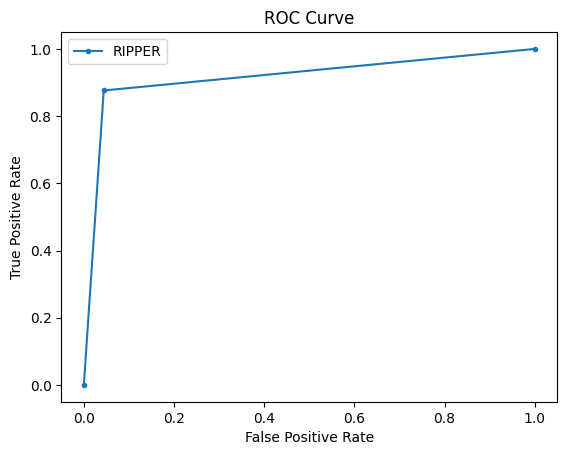

In [222]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RIPPER', marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Méthode Prism

In [223]:
file = "datasets/cars.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,Pachat,Pmaint,Nportes,Npers,Tcoffre,Surete,Verdict
0,thaut,thaut,2.0,2.0,petit,bas,nacc
1,thaut,thaut,2.0,2.0,petit,moyen,nacc
2,thaut,thaut,2.0,2.0,petit,haut,nacc
3,thaut,thaut,2.0,2.0,moyen,bas,nacc
4,thaut,thaut,2.0,2.0,moyen,moyen,nacc
...,...,...,...,...,...,...,...
1723,bas,bas,5plus,plus,moyen,moyen,bon
1724,bas,bas,5plus,plus,moyen,haut,tbon
1725,bas,bas,5plus,plus,grand,bas,nacc
1726,bas,bas,5plus,plus,grand,moyen,bon


In [224]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [225]:
prism = PrismRules()

rules = prism.get_prism_rules(data_train, "Verdict")


........................................................................
Target: nacc
........................................................................
Surete = bas
   Support:  the target has value: 'nacc' for 100.000% of the 469 rows matching the rule 
   Coverage: the rule matches: 469 out of 975 rows for target value: 'nacc'. This is:
      48.103% of total rows for target value: 'nacc'
      33.936% of total rows in data
Npers = 2.0
   Support:  The target has value: 'nacc' for 100.000% of the 298 remaining rows matching the rule
   Coverage: The rule matches: 298 out of 506 rows remaining for target value: 'nacc'. This is:
      58.893% of remaining rows for target value: 'nacc'
      30.564% of total rows for target value: 'nacc'
      21.563% of total rows in data
Pmaint = thaut AND Pachat = thaut
   Support:  The target has value: 'nacc' for 100.000% of the 37 remaining rows matching the rule
   Coverage: The rule matches: 37 out of 208 rows remaining for target value:

In [226]:
X_test = data_test.drop(columns='Verdict')
y_test = data_test['Verdict']

prism_prediction = prism.predict(X_test)

eval_prism = eval_method(y_test, prism_prediction)

Accuracy :  0.6907514450867052
ROC AUC Score :  0.5244609957994159
Kappa :  0.0697989949748743
Confusion Matrix :
 [[  2   0  78   3]
 [  0   0  11   0]
 [  0   0 235   0]
 [  0   0  15   2]]


Au premier abord, on remarque que le modèle a une bonne précision (0.72). Cependant, cela est du au fait que la classe "non acceptable" est sur représentée dans la base de données. Le ROC AUC Score étant proche de 0.5 et le coefficent Kappa proche de 0 indique que le modèle fait à peine mieux qu'une classification aléatoire.

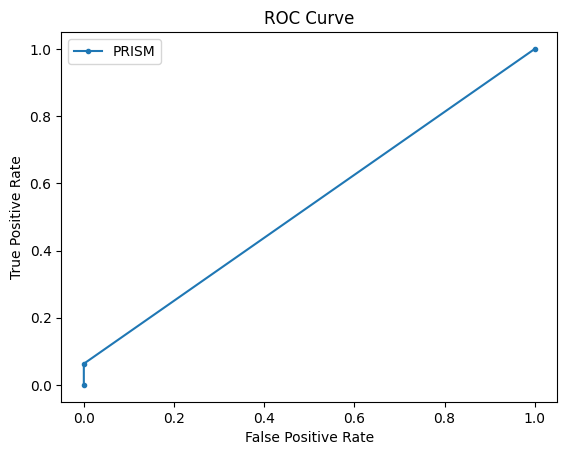

In [232]:
prism_roc = prism_prediction != "nacc"
y_test_roc = y_test != "nacc"

fpr, tpr, thresholds = roc_curve(y_test_roc, prism_roc)
plt.plot(fpr, tpr, label='PRISM', marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Decision table

Comme cette méthode n'existe pas en python, elle a été faite sur WEKA

![Resultat DT](images\cars_decision-table.png)

Exemple de règles trouvés par WEKA:

| Pachat | Pmaint | Npers | Tcoffre | Surete | Verdict |
|--------|--------|-------|---------|--------|---------|
| bas    | bas    | plus  | grand   | haut   | tbon    |
| moyen  | bas    | plus  | grand   | haut   | tbon    |
| haut   | bas    | plus  | grand   | haut   | acc     |
| thaut  | bas    | plus  | grand   | haut   | acc     |
| bas    | moyen  | plus  | grand   | haut   | tbon    |
| moyen  | moyen  | plus  | grand   | haut   | tbon    |
| haut   | moyen  | plus  | grand   | haut   | acc     |
| thaut  | moyen  | plus  | grand   | haut   | acc     |
| bas    | bas    | 4.0   | grand   | haut   | tbon    |
| bas    | haut   | plus  | grand   | haut   | tbon    |
| moyen  | bas    | 4.0   | grand   | haut   | tbon    |
| moyen  | haut   | plus  | grand   | haut   | acc     |
| haut   | bas    | 4.0   | grand   | haut   | acc     |
| haut   | haut   | plus  | grand   | haut   | acc     |
| thaut  | bas    | 4.0   | grand   | haut   | acc     |


In [175]:
eval_decision_table = {
    "accuracy": 0.904624,
    "roc_auc": 0.953,
    "kappa": 0.786,
    "confusion":
    [[234,5,0,2], [14,65,0,0],[0,2,7,3], [1,5,1,7]]
}

Courbe ROC pour nacc

![ROC](images\roc_DT.png)

### Decision Table Naive Bayes

![Resultat DTNB](images\cars_DTNB.png)

Des exemples de règles déterminées par WEKA : 
| Pachat | Pmaint | Tcoffre | Surete | Verdict |
|--------|--------|---------|--------|---------|
| bas    | bas    | grand   | haut   | tbon    |
| moyen  | bas    | grand   | haut   | tbon    |
| haut   | bas    | grand   | haut   | acc     |
| thaut  | bas    | grand   | haut   | acc     |
| bas    | moyen  | grand   | haut   | tbon    |
| moyen  | moyen  | grand   | haut   | tbon    |
| haut   | moyen  | grand   | haut   | acc     |
| thaut  | moyen  | grand   | haut   | acc     |
| bas    | bas    | moyen   | haut   | tbon    |
| bas    | haut   | grand   | haut   | tbon    |
| moyen  | bas    | moyen   | haut   | tbon    |
| moyen  | haut   | grand   | haut   | acc     |


In [176]:
eval_dtnb = {
    "accuracy": 0.930636,
    "roc_auc": 0.990,
    "kappa": 0.8507,
    "confusion":
    [[232,7,0,2], [6,71,1,1],[0,1,8,3], [0,2,1,11]]
}

Courbe ROC pour nacc

![ROC](images\roc_DTNB.png)

### Results

In [177]:
score_cars = pd.DataFrame([eval_ripper, eval_prism, eval_decision_table, eval_dtnb], index=["ripper", "prism", "decision_table", "DTNB"])
score_cars

,accuracy,roc_auc,precision,recall,f1-score,kappa,confusion
ripper,0.962428,0.972689,0.892562,1.0,0.943231,0.915289,"[[225, 13], [0, 108]]"
prism,0.690751,0.524461,NaN,NaN,NaN,0.069799,"[[2, 0, 78, 3], [0, 0, 11, 0], [0, 0, 235, 0],..."
decision_table,0.904624,0.953000,NaN,NaN,NaN,0.786000,"[[234, 5, 0, 2], [14, 65, 0, 0], [0, 2, 7, 3],..."
DTNB,0.930636,0.990000,NaN,NaN,NaN,0.850700,"[[232, 7, 0, 2], [6, 71, 1, 1], [0, 1, 8, 3], ..."


Ici, on remarque que ripper est la meilleur méthode. Cependant on a fait une hypothèse simplificatrice sur la base de données (réduction de l'attribut cible à deux classes). Sinon, la méthode Decision Tree naive Bayes est la meilleure pour les classifications multiclasses.

## Base "vote"

### Méthode Ripper

In [ ]:
file = "datasets/vote.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


In [179]:
le = LabelEncoder()
X = data.drop(columns='Class')
y = data['Class']
y = y == 'democrat' # ici, democrate est la classe positive

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ripper_clf = lw.RIPPER() # Or irep_clf = lw.IREP() to build a model using IREP
ripper_clf.fit(X_train, y_train) # Or pass X and y data to .fit
ripper_clf

<RIPPER(max_rule_conds=None, prune_size=0.33, max_rules=None, max_total_conds=None, n_discretize_bins=10, k=2, dl_allowance=64, verbosity=0, alpha=1.0, random_state=None) with fit ruleset>

In [181]:
ripper_clf.out_model()

[[physician-fee-freeze=n] V
[physician-fee-freeze=? ^ religious-groups-in-schools=y] V
[export-administration-act-south-africa=? ^ mx-missile=y]]


In [182]:
y_pred = ripper_clf.predict(X_test)
eval_ripper = eval_method(y_test, y_pred)

Accuracy :  0.9655172413793104
ROC AUC Score :  0.9727272727272727
Precision :  1.0
Recall :  0.9454545454545454
F1 Score :  0.9719626168224299
Kappa :  0.9272777932571747
Confusion Matrix :
 [[32  0]
 [ 3 52]]


### Méthode Prism

In [183]:
file = "datasets/vote.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


In [184]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
prism = PrismRules()

rules = prism.get_prism_rules(data_train, "Class")


........................................................................
Target: republican
........................................................................
physician-fee-freeze = y AND water-project-cost-sharing = ?
   Support:  the target has value: 'republican' for 100.000% of the 15 rows matching the rule 
   Coverage: the rule matches: 15 out of 137 rows for target value: 'republican'. This is:
      10.949% of total rows for target value: 'republican'
      4.310% of total rows in data
physician-fee-freeze = y AND immigration = y AND synfuels-corporation-cutback = n
   Support:  The target has value: 'republican' for 100.000% of the 55 remaining rows matching the rule
   Coverage: The rule matches: 55 out of 122 rows remaining for target value: 'republican'. This is:
      45.082% of remaining rows for target value: 'republican'
      40.146% of total rows for target value: 'republican'
      15.805% of total rows in data
physician-fee-freeze = y AND synfuels-corporation

In [ ]:
X_test = data_test.drop(columns='Class')
y_test = data_test['Class']

prism_prediction = prism.predict(X_test)

# print(prism_prediction=="democrat")
# print(y_test=="democrat")
prism_prediction = prism_prediction == "democrat"
y_test = y_test == "democrat"
# print(precision_score(y_test, prism_prediction))

eval_prism = eval_method(y_test, prism_prediction)

Accuracy :  0.9655172413793104
ROC AUC Score :  0.9516129032258064
Precision :  0.9491525423728814
Recall :  1.0
F1 Score :  0.9739130434782609
Kappa :  0.9231675007359434
Confusion Matrix :
 [[28  3]
 [ 0 56]]


In [187]:
score_vote = pd.DataFrame([eval_ripper, eval_prism], index=["ripper", "prism"])
score_vote

,accuracy,roc_auc,precision,recall,f1-score,kappa,confusion
ripper,0.965517,0.972727,1.000000,0.945455,0.971963,0.927278,"[[32, 0], [3, 52]]"
prism,0.965517,0.951613,0.949153,1.000000,0.973913,0.923168,"[[28, 3], [0, 56]]"


### Decision Table

![Results DT](images\vote_decision-table.png)

| adoption-of-the-budget-resolution | physician-fee-freeze | education-spending | export-administration-act-south-africa | Class      |
|-----------------------------------|----------------------|--------------------|----------------------------------------|------------|
| ?                                 | ?                    | ?                  | ?                                      | democrat   |
| n                                 | y                    | ?                  | ?                                      | republican |
| ?                                 | ?                    | y                  | ?                                      | democrat   |
| y                                 | n                    | ?                  | ?                                      | democrat   |
| y                                 | ?                    | ?                  | y                                      | democrat   |
| y                                 | y                    | y                  | ?                                      | democrat   |
| n                                 | y                    | y                  | ?                                      | republican |
| y                                 | y                    | ?                  | y                                      | democrat   |
| n                                 | n                    | y                  | ?                                      | democrat   |
| y                                 | n                    | y                  | ?                                      | democrat   |
| ?                                 | ?                    | n                  | ?                                      | democrat   |
| n                                 | n                    | ?                  | y                                      | democrat   |


In [154]:
eval_decision_table = {
    "accuracy": 0.942529,
    "roc_auc": 0.985,
    "precision": 0.961,
    "recall": 0.943,
    "f1-score": 0.943,
    "kappa": 0.8811,
    "confusion":
    [[49,3], [2,33]]
}

### Decision Table Naive Bayes

![Result DTNB](images\vote_DTNB.png)

Des règles sont : 
| handicapped-infants | water-project-cost-sharing | adoption-of-the-budget-resolution | el-salvador-aid | religious-groups-in-schools | anti-satellite-test-ban | mx-missile | immigration | crime | duty-free-exports | export-administration-act-south-africa | Class      |
|---------------------|----------------------------|------------------------------------|-----------------|----------------------------|-------------------------|------------|-------------|-------|-------------------|----------------------------------------|------------|
| n                   | y                          | n                                  | y               | y                          | n                       | n          | n           | y     | ?                 | ?                                      | democrat   |
| n                   | n                          | n                                  | y               | y                          | y                       | n          | y           | y     | y                 | y                                      | republican |
| ?                   | y                          | n                                  | n               | n                          | y                       | y          | y           | y     | y                 | y                                      | democrat   |
| n                   | y                          | y                                  | y               | y                          | y                       | y          | y           | y     | n                 | y                                      | republican |
| y                   | y                          | y                                  | n               | n                          | y                       | y          | n           | ?     | y                 | y                                      | democrat   |
| n                   | y                          | y                                  | n               | y                          | y                       | y          | n           | y     | y                 | y                                      | democrat   |
| y                   | n                          | y                                  | n               | y                          | y                       | n          | y           | y     | y                 | y                                      | democrat   |
| y                   | n                          | y                                  | n               | n                          | y                       | y          | y           | n     | y                 | ?                                      | democrat   |
| n                   | n                          | y                                  | n               | n                          | y                       | y          | y           | n     | y                 | ?                                      | democrat   |
| ?                   | n                          | y                                  | n               | n                          | y                       | y          | y           | n     | y                 | ?                                      | democrat   |
| n                   | n                          | n                                  | n               | n                          | y                       | y          | y           | y     | y                 | y                                      | democrat   |
| n                   | ?                          | y                                  | n               | y                          | y                       | n          | y           | n     | y                 | ?                                      | democrat   |
| n                   | y                          | y                                  | n               | n                          | y                       | y          | n           | n     | ?                 | ?                                      | democrat   |
| y                   | y                          | y                                  | n               | n                          | y                       | y          | n           | n     | ?                 | ?                                      | democrat   |
| y                   | n                          | y                                  | n               | y                          | y                       | y          | n           | y     | y                 | y                                      | democrat   |
| n                   | y                          | y                                  | n               | y                          | y                       | y          | y           | n     | y                 | y                                      | democrat   |
| y                   | y                          | y                                  | y               | y                          | n                       | n          | y           | y     | y                 | y                                      | democrat   |
| n                   | n                          | y                                  | n               | y                          | y                       | y          | n           | y     | y                 | y                                      | democrat   |
| n                   | y                          | n                                  | y               | y                          | n                       | n          | y           | ?     | n                 | ?                                      | democrat   |


In [155]:
eval_dtnb = {
    "accuracy": 0.932529,
    "roc_auc": 0.976,
    "precision": 0.961,
    "recall": 0.942,
    "f1-score": 0.951,
    "kappa": 0.8811,
    "confusion":
    [[49,3], [2,33]]
}

### Results

In [ ]:
score_vote = pd.DataFrame([eval_ripper, eval_prism, eval_decision_table, eval_dtnb], index=["ripper", "prism", "decision_table", "DTNB"])
score_vote

,accuracy,roc_auc,precision,recall,f1-score,kappa,confusion
ripper,0.965517,0.972727,1.000000,0.945455,0.971963,0.927278,"[[32, 0], [3, 52]]"
prism,0.965517,0.951613,0.949153,1.000000,0.973913,0.923168,"[[28, 3], [0, 56]]"
decision_table,0.942529,0.985000,0.961000,0.943000,0.943000,0.881100,"[[49, 3], [2, 33]]"
DTNB,0.932529,0.976000,0.961000,0.942000,0.951000,0.881100,"[[49, 3], [2, 33]]"


On remarque que les méthodes ripper et prism on des résultats similaires, de même pour decision table et DTNB. Ici, la meilleure méthode serait ripper (avec la meilleur accuracy et kappa, et un très bon roc_auc)

In [233]:
score_cars

,accuracy,roc_auc,precision,recall,f1-score,kappa,confusion
ripper,0.962428,0.972689,0.892562,1.0,0.943231,0.915289,"[[225, 13], [0, 108]]"
prism,0.690751,0.524461,NaN,NaN,NaN,0.069799,"[[2, 0, 78, 3], [0, 0, 11, 0], [0, 0, 235, 0],..."
decision_table,0.904624,0.953000,NaN,NaN,NaN,0.786000,"[[234, 5, 0, 2], [14, 65, 0, 0], [0, 2, 7, 3],..."
DTNB,0.930636,0.990000,NaN,NaN,NaN,0.850700,"[[232, 7, 0, 2], [6, 71, 1, 1], [0, 1, 8, 3], ..."


On voit donc que les méthodes qui ont les meilleur résultats sont différents selon les bases de données. Un des travail du data scientist est donc de tester plusieurs méthodes sur une même base de données pour savoir quelle est la plus performante.